In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# data => banknotes.csv

In [5]:
df = pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.shape

(1372, 5)

In [11]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [13]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [15]:
x = df.drop('Class', axis = 1)
y = df['Class']

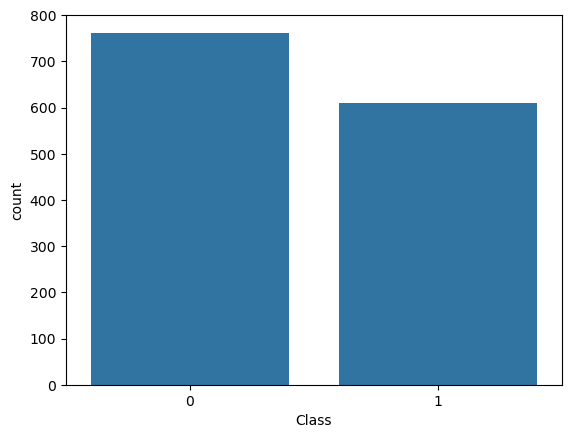

In [17]:
sns.countplot(x = y);

In [19]:
# cross validation

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0)

In [23]:
x_train.shape, y_train.shape

((1029, 4), (1029,))

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier(random_state= 0)

In [29]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
# evaluate

In [33]:
y_pred = dt.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

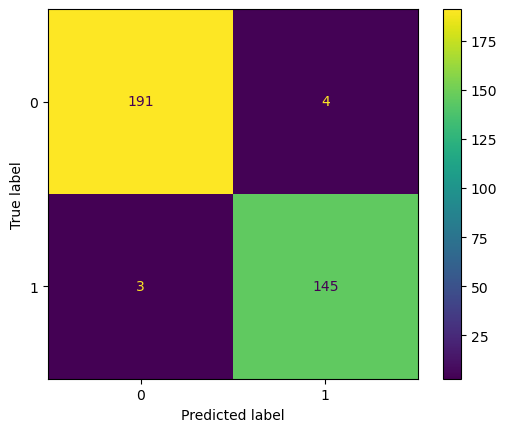

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [43]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [45]:
# plot the tree

In [47]:
from sklearn.tree import plot_tree

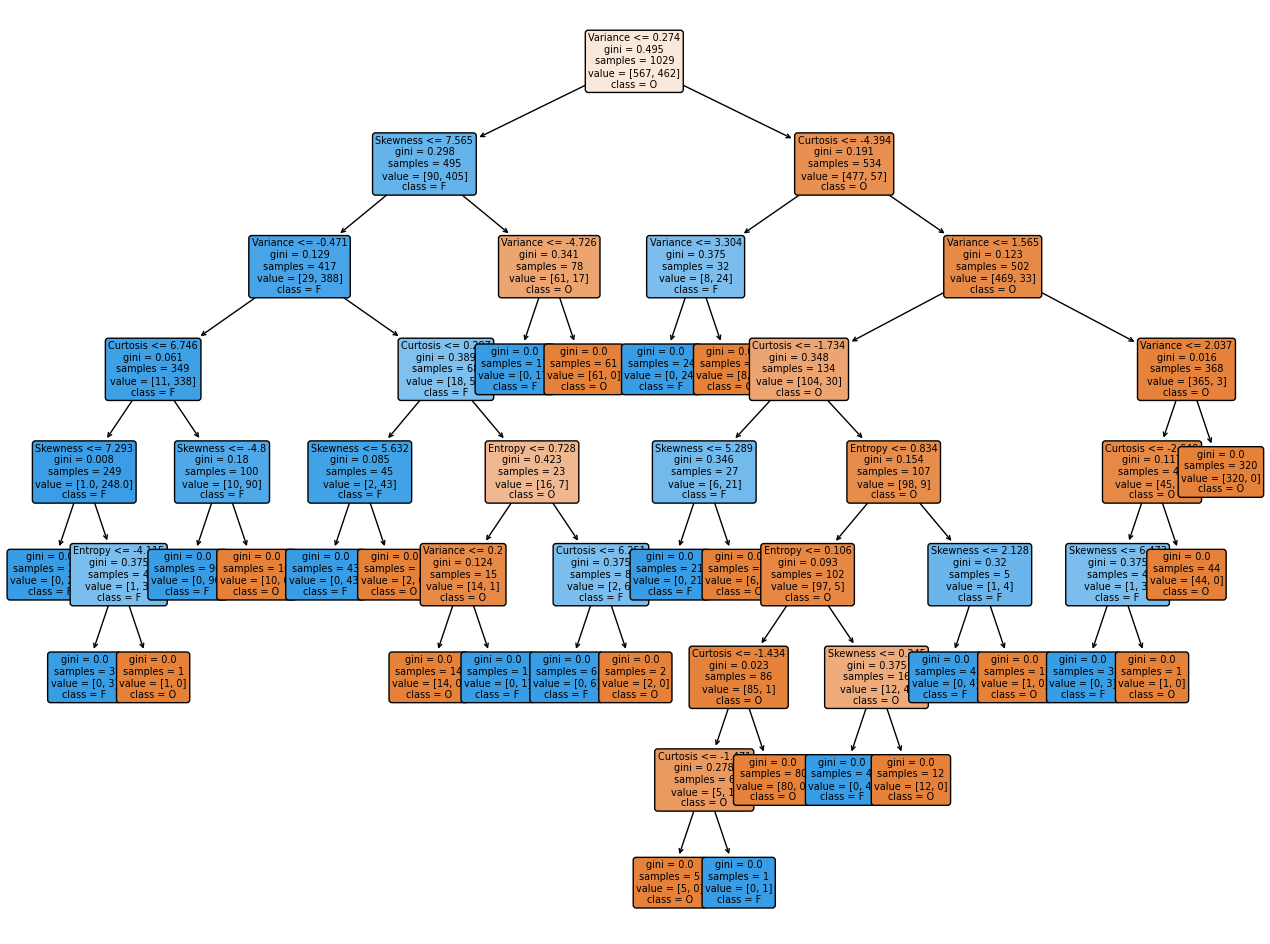

In [53]:
plt.figure(figsize=(16, 12))
plot_tree(dt, filled = True, rounded= True, fontsize = 7,
         class_names= ['O', 'F'], feature_names= x.columns);

In [57]:
x.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [55]:
dt.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

In [59]:
# plot the bar graph for feature importance

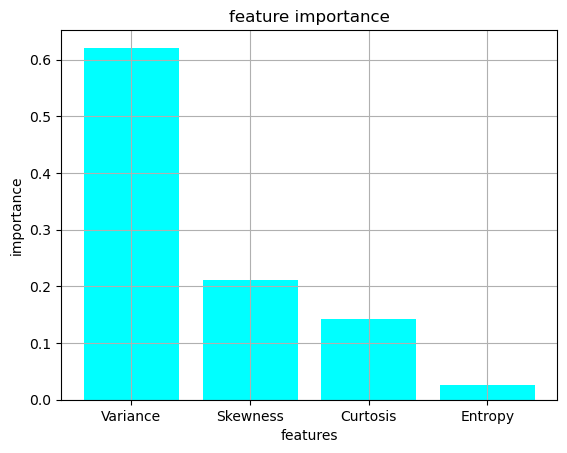

In [61]:
plt.title("feature importance")
plt.xlabel("features")
plt.ylabel("importance")
plt.bar(x.columns, dt.feature_importances_, color = 'cyan')
plt.grid();